# Preparing London weather station data

In [225]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5

import warnings
warnings.filterwarnings('ignore')

In [226]:
#read dataset
df = pd.read_csv("../data/GSOD/merged_cities/LONDONDERRY EGLINTON.csv")

In [227]:
df

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,0,3908499999,1990-04-25,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",52.0,10,44.8,...,20.0,31.1,53.6,*,50.0,*,99.99,,999.9,10000
1,1,3908499999,1990-04-26,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",47.0,9,37.8,...,15.9,999.9,50.0,*,44.6,*,99.99,,999.9,10000
2,2,3908499999,1990-04-27,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",48.8,6,38.0,...,7.0,999.9,51.8,*,44.6,*,0.00,I,999.9,0
3,3,3908499999,1990-04-28,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",57.6,9,52.4,...,17.1,999.9,64.4,*,51.8,*,0.00,I,999.9,0
4,4,3908499999,1990-04-29,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",58.7,7,50.5,...,11.1,999.9,62.6,*,53.6,*,0.00,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,10668,3908499999,2019-11-14,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",43.5,16,37.7,...,22.0,34.0,44.6,*,42.8,*,99.99,,999.9,10000
10669,10669,3908499999,2019-11-15,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",43.1,16,38.5,...,11.1,999.9,46.4,*,37.4,*,99.99,,999.9,10000
10670,10670,3908499999,2019-11-16,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",37.1,7,36.9,...,5.1,999.9,39.2,*,33.8,*,0.00,I,999.9,100000
10671,10671,3908499999,2019-11-17,55.042778,-7.161111,6.7,"LONDONDERRY EGLINTON, UK",43.4,12,39.4,...,17.1,999.9,50.0,*,35.6,*,99.99,,999.9,10000


In [228]:
# drop old index column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

# drop redundant column swith info about weather station
df.drop(["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME"], axis=1, inplace=True)

# drop "attributes"
df.drop(["TEMP_ATTRIBUTES", "DEWP_ATTRIBUTES", "SLP_ATTRIBUTES", "STP_ATTRIBUTES", 
         "VISIB_ATTRIBUTES", "WDSP_ATTRIBUTES", "MAX_ATTRIBUTES", "MIN_ATTRIBUTES", "PRCP_ATTRIBUTES"], 
        axis=1, inplace=True)

# drop redundant weather info (max speed of wind, maximum wind gust, min and max temperature, snow depth,  
# indicator for occurrence of: fog, rain or drizzle, snow or ice pellets, hail, thunder, 
# tornado/funnel cloud respectively )
df.drop(["MXSPD", "GUST", "MAX", "MIN", "SNDP", "FRSHTT"], axis=1, inplace=True)

In [229]:
# change index
df.set_index([pd.to_datetime(df.DATE)], inplace=True)
df.drop(["DATE"], axis=1, inplace=True)

In [230]:
df.head()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
DATE,,,,,,,
1990-04-25,52.0,44.8,9999.9,999.9,6.6,16.0,99.99
1990-04-26,47.0,37.8,9999.9,999.9,6.5,9.9,99.99
1990-04-27,48.8,38.0,9999.9,999.9,7.0,5.0,0.00
1990-04-28,57.6,52.4,9999.9,999.9,7.0,14.3,0.00
1990-04-29,58.7,50.5,9999.9,999.9,7.0,9.2,0.00


__Missing data handling__

In [231]:
df.isna().sum()

TEMP     0
DEWP     0
SLP      0
STP      0
VISIB    0
WDSP     0
PRCP     0
dtype: int64

As we can see, there are no nans in the data

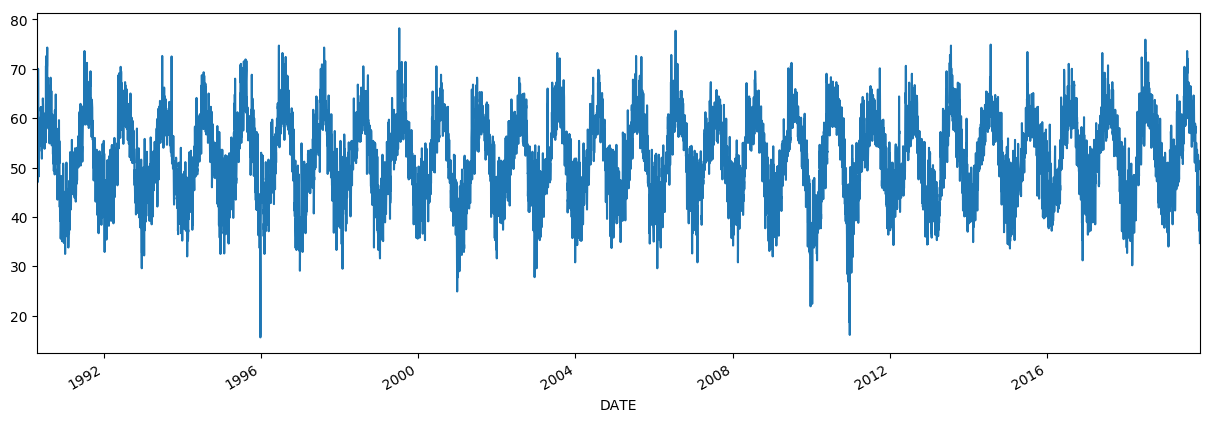

In [232]:
df.TEMP.plot()

Data for 1990 year start only from 1990-04-25, so lets drop whole 1990 year, and impute it. Also, there are a lot of missing days in the data, we need to impute them also.

In [233]:
# remove 1990 year from the data
df = df.loc["1991-01-01": ,:]
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
DATE,,,,,,,
1991-01-02,42.1,34.2,9999.9,999.9,7.0,18.3,99.99
1991-01-03,36.6,29.9,9999.9,999.9,7.0,17.9,0.00
1991-01-04,43.0,35.4,9999.9,999.9,6.6,21.0,99.99
1991-01-05,41.0,35.9,9999.9,999.9,4.2,31.2,99.99
1991-01-06,37.4,31.1,9999.9,999.9,6.7,11.7,99.99
...,...,...,...,...,...,...,...
2019-11-14,43.5,37.7,9999.9,999.9,6.2,14.6,99.99
2019-11-15,43.1,38.5,9999.9,999.9,6.2,6.9,99.99
2019-11-16,37.1,36.9,9999.9,999.9,6.2,1.9,0.00


In [218]:
all_days = [str(day)[4:10] for day in pd.date_range(start='1/1/' + "2018", end='1/1/' + "2019")[:-1]]
missing_days = []

for year in range(1991, 2019):
    for day in all_days:
        if (str(year) + day not in df.index):
            missing_days.append(str(year) + day)

In [219]:
missing_days

['1991-01-01',
 '1991-12-25',
 '1991-12-26',
 '1992-01-01',
 '1992-06-01',
 '1992-10-30',
 '1992-11-04',
 '1992-12-25',
 '1993-01-01',
 '1993-06-30',
 '1993-10-29',
 '1993-12-25',
 '1993-12-26',
 '1994-02-19',
 '1994-07-14',
 '1994-12-25',
 '1994-12-26',
 '1995-01-01',
 '1995-01-14',
 '1995-12-25',
 '1996-12-08',
 '1996-12-25',
 '1997-12-25',
 '1998-03-30',
 '1998-04-25',
 '1998-08-14',
 '1998-08-16',
 '1998-10-20',
 '1998-12-25',
 '1998-12-26',
 '1999-01-01',
 '1999-01-09',
 '1999-01-10',
 '1999-01-28',
 '1999-01-29',
 '1999-01-30',
 '1999-01-31',
 '1999-02-01',
 '1999-02-02',
 '1999-03-28',
 '1999-04-08',
 '1999-05-01',
 '1999-05-24',
 '1999-06-12',
 '1999-07-20',
 '1999-09-13',
 '1999-12-25',
 '1999-12-26',
 '2000-01-01',
 '2000-12-24',
 '2000-12-25',
 '2001-01-01',
 '2001-05-11',
 '2001-06-02',
 '2001-06-16',
 '2001-06-20',
 '2001-06-30',
 '2001-07-04',
 '2001-07-19',
 '2001-08-11',
 '2001-12-25',
 '2002-10-26',
 '2002-12-25',
 '2003-12-25',
 '2004-12-25',
 '2005-01-01',
 '2005-12-

So, there are 114 missing days, lets impute them.

In [234]:
def insert_day(df, date, all_days):
    first =  df.loc[:date, :]
    second = df.loc[date:, :]
    day = {col:[column_mean(df, col, date)] for col in df.columns}
    
    return pd.concat([first, pd.DataFrame(data=day, index=[pd.to_datetime(date)]), second])

In [235]:
for day in missing_days:
    df = insert_day(df, day, all_days)

In [236]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1991-01-01,43.004762,38.395238,9999.9,999.9,6.328571,10.852381,57.137143
1991-01-02,42.100000,34.200000,9999.9,999.9,7.000000,18.300000,99.990000
1991-01-03,36.600000,29.900000,9999.9,999.9,7.000000,17.900000,0.000000
1991-01-04,43.000000,35.400000,9999.9,999.9,6.600000,21.000000,99.990000
1991-01-05,41.000000,35.900000,9999.9,999.9,4.200000,31.200000,99.990000
...,...,...,...,...,...,...,...
2019-11-14,43.500000,37.700000,9999.9,999.9,6.200000,14.600000,99.990000
2019-11-15,43.100000,38.500000,9999.9,999.9,6.200000,6.900000,99.990000
2019-11-16,37.100000,36.900000,9999.9,999.9,6.200000,1.900000,0.000000
2019-11-17,43.400000,39.400000,9999.9,999.9,6.000000,9.700000,99.990000


In [238]:
# returns mean value for exact day of a year
def column_mean(df, column, date):
    total = 0
    all_years = [day for day in df.index if (str(date)[4:] in str(day) and str(date)[:4] not in str(day))]
    
    for year in all_years:
        total += df.at[year, column]
        
    if len(all_years) == 0:
        return month_mean(df, column, date)
    else:
        return (total / len(all_years))

In [239]:
def month_mean(df, column, date):
    month = date[:7]
    month_data = [date for date in df.index if month in str(date)]
    
    total = 0
    for day in month_data:
        total += df.at[day, column]
    return(total/ len(month_data))

In [240]:
# creates data for whole year, using mean value imputation
def create_missing_year(df, year):
    dates = pd.date_range(start='1/1/' + str(year), end='1/1/' + str(year + 1))[:-1]
    missing_data = dict()
    
    for col in df.columns:
        missing_data[col] = []
        
    for col in df.columns:
        for date in dates:
            missing_data[col].append(column_mean(df, col, date))
    
    missing_data = pd.DataFrame(data=missing_data, index=dates)
    
    return missing_data

In [241]:
# inserts missing year to dataset
def insert_year(df, year_df,  year):
    if year == 1990:
        return pd.concat([year_df, df])
    
    all_years = [str(date)[:4] for date in df.index if "-01-01" in str(date)]
    previous_year = str(year)
    while not previous_year in all_years:
        previous_year = str(int(previous_year) - 1)
    
    last_day = [date for date in df.index if previous_year in str(date)][-1]
    
    first_part = df.loc[:last_day, :]
    second_part = df.loc[last_day:,:][1:]
    
    return pd.concat([first_part, year_df, second_part])

In [242]:
missing_year =  create_missing_year(df, 1990)

In [243]:
missing_year

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1990-01-01,43.004762,38.395238,9999.9,999.9,6.328571,10.852381,57.137143
1990-01-02,43.500000,38.951724,9999.9,999.9,6.613793,11.300000,62.062759
1990-01-03,42.613793,37.693103,9999.9,999.9,6.606897,12.893103,65.510690
1990-01-04,42.041379,37.975862,9999.9,999.9,6.410345,10.675862,65.510690
1990-01-05,43.144828,38.586207,9999.9,999.9,6.510345,11.613793,68.958621
...,...,...,...,...,...,...,...
1990-12-27,40.575000,37.367857,9999.9,999.9,6.153571,7.103571,64.279286
1990-12-28,40.764286,392.364286,9999.9,999.9,6.367857,8.925000,46.423929
1990-12-29,41.603571,37.414286,9999.9,999.9,41.778571,11.464286,64.279286
1990-12-30,43.085714,38.860714,9999.9,999.9,6.342857,10.400000,53.566071


In [244]:
df = insert_year(df, missing_year, 1990)

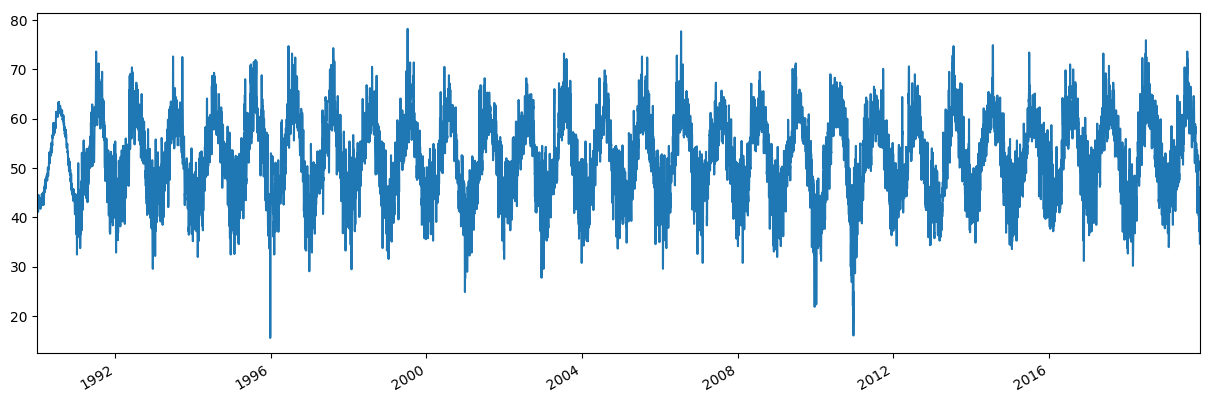

In [245]:
df.TEMP.plot()

In [248]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1990-01-01,43.004762,38.395238,9999.9,999.9,6.328571,10.852381,57.137143
1990-01-02,43.500000,38.951724,9999.9,999.9,6.613793,11.300000,62.062759
1990-01-03,42.613793,37.693103,9999.9,999.9,6.606897,12.893103,65.510690
1990-01-04,42.041379,37.975862,9999.9,999.9,6.410345,10.675862,65.510690
1990-01-05,43.144828,38.586207,9999.9,999.9,6.510345,11.613793,68.958621
...,...,...,...,...,...,...,...
2019-11-14,43.500000,37.700000,9999.9,999.9,6.200000,14.600000,99.990000
2019-11-15,43.100000,38.500000,9999.9,999.9,6.200000,6.900000,99.990000
2019-11-16,37.100000,36.900000,9999.9,999.9,6.200000,1.900000,0.000000
2019-11-17,43.400000,39.400000,9999.9,999.9,6.000000,9.700000,99.990000


__Data reduction__

As we have daily data for 30 years (more that 10,000 instances), it will take a lot of time to fit good model for such big data. Here I reduce daily data to weekly, by taking mean of whole week as value of that one week 

In [249]:
# returns dict with mean values of corresponding column at the certain week 
def week_mean(df, date):
    week = dict()
    
    digits = list(date)
    digits[-2:] = str(int("".join(digits[-2:])) + 6)
    end = "".join(digits)
    
    data = df.loc[date:end, :]
    
    for col in data.columns:
        week[col] = data[col].mean()
    
    return week

In [250]:
# generates month data
def create_month_data(df, year_n_month):
    month = dict()
    for col in df.columns:
        month[col] = []
    
    checkpoints = ["-01", "-08", "-15", "-22"]
    indexes = [year_n_month + day for day in checkpoints]
    
    for idx in indexes:
        week = week_mean(df, idx)
        for i in month.keys():
            month[i].append(week[i])
            
    new_month = pd.DataFrame(data=month, index=indexes)
    
    return new_month

In [251]:
def reduce_dataset(df):
    months = [str(year_n_month)[:7] for year_n_month in df.index if str(year_n_month)[8:10] == "01"]

    new_months = [create_month_data(df, month) for month in months]
    
    df = pd.concat(new_months)
    
    return df

In [252]:
df =  reduce_dataset(df)

In [253]:
df

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
1990-01-01,43.031222,38.491931,9999.9,999.9,11.417382,11.254774,63.821907
1990-01-08,43.056439,38.555876,9999.9,999.9,6.461101,11.913353,61.499831
1990-01-15,43.016749,38.731034,9999.9,999.9,11.217734,10.875369,64.033005
1990-01-22,43.135345,38.474156,9999.9,999.9,6.228783,11.063916,58.931474
1990-02-01,43.112913,38.332108,9999.9,999.9,6.351513,11.301232,63.628401
...,...,...,...,...,...,...,...
2019-10-22,46.757143,42.357143,9999.9,999.9,6.185714,10.514286,85.705714
2019-11-01,48.614286,46.014286,9999.9,999.9,6.000000,6.914286,85.705714
2019-11-08,42.614286,38.542857,9999.9,999.9,6.042857,9.728571,85.705714
2019-11-15,39.575000,37.125000,9999.9,999.9,6.150000,5.175000,49.995000


In [254]:
df[df.TEMP.isnull()].index.tolist()

['2019-11-22']

As we can see, during data reduction new missing values appear, so here I impute them

In [256]:
for indx in df[df.TEMP.isnull()].index.tolist():
    for col in df.columns:
        df.xs(indx)[col] = column_mean(df, col, indx)

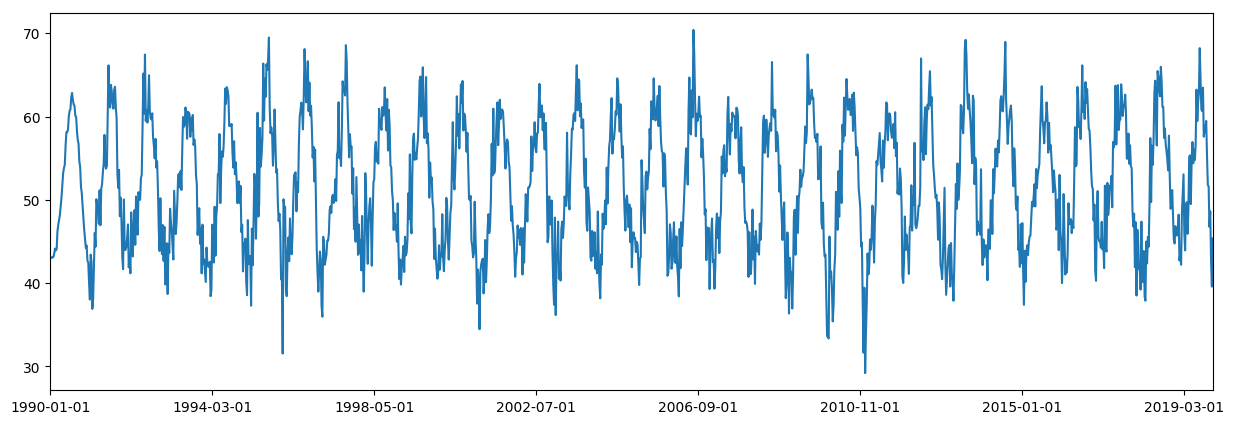

In [257]:
df.TEMP.plot()

Now, our data is cleaned, reduced in more than 7 times and without missing values

In [258]:
df.describe()

,TEMP,DEWP,SLP,STP,VISIB,WDSP,PRCP
count,1436.000000,1436.000000,1.436000e+03,1.436000e+03,1436.000000,1436.000000,1436.000000
mean,51.716368,47.402798,9.999900e+03,9.999000e+02,10.607051,10.446937,54.985946
std,7.492234,39.748043,3.593339e-12,1.746851e-13,33.973222,5.976037,28.147163
min,29.185714,27.614286,9.999900e+03,9.999000e+02,2.914286,1.985714,0.000000
25%,45.535714,40.225000,9.999900e+03,9.999000e+02,6.157143,8.335714,28.568571
50%,51.457143,45.421429,9.999900e+03,9.999000e+02,6.614286,10.043842,57.137143
75%,58.146429,51.485714,9.999900e+03,9.999000e+02,6.842857,12.003571,71.421429
max,70.400000,1512.435893,9.999900e+03,9.999000e+02,573.700000,151.527041,99.990000


As we can see, SLP and STP columns are not changing during time, and our prediction will be same (999.99). So, lets drop them:

In [263]:
df.drop(["SLP", "STP"], axis=1, inplace=True)
df

,TEMP,DEWP,VISIB,WDSP,PRCP
1990-01-01,43.031222,38.491931,11.417382,11.254774,63.821907
1990-01-08,43.056439,38.555876,6.461101,11.913353,61.499831
1990-01-15,43.016749,38.731034,11.217734,10.875369,64.033005
1990-01-22,43.135345,38.474156,6.228783,11.063916,58.931474
1990-02-01,43.112913,38.332108,6.351513,11.301232,63.628401
...,...,...,...,...,...
2019-10-22,46.757143,42.357143,6.185714,10.514286,85.705714
2019-11-01,48.614286,46.014286,6.000000,6.914286,85.705714
2019-11-08,42.614286,38.542857,6.042857,9.728571,85.705714
2019-11-15,39.575000,37.125000,6.150000,5.175000,49.995000


__Outliers__

In [270]:
def replace_outliers(df, column):
    m = df[column].mean()
    std = df[column].std()
    
    for index, row in df.iterrows():
        if (abs(row[column]) > m + 3 * std):
            df.xs(index)[column] = column_mean(df, column, index)
    return df

In columns DEWP and VISIB there are some outliers, so lets replace them with mean value.

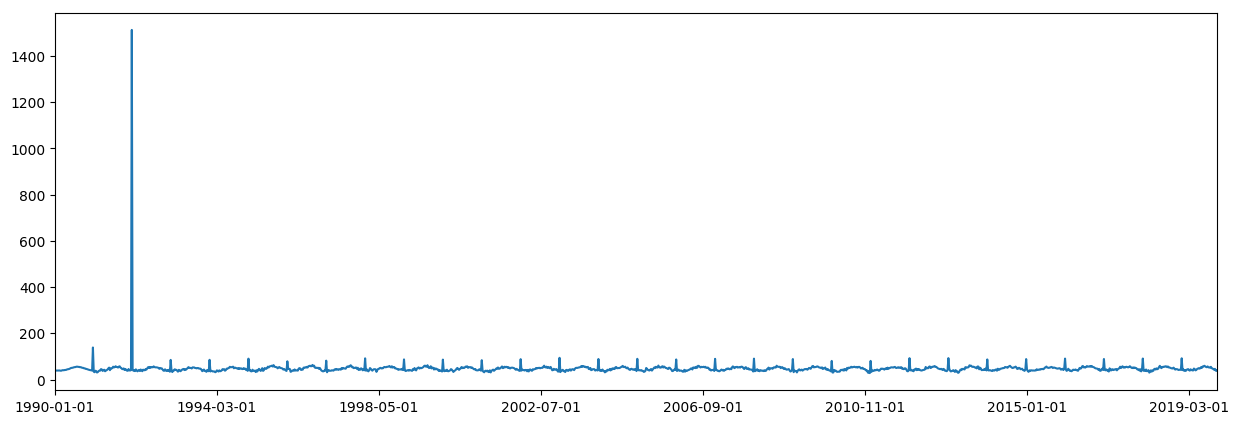

In [268]:
df.DEWP.plot()

In [271]:
df = replace_outliers(df, "DEWP")

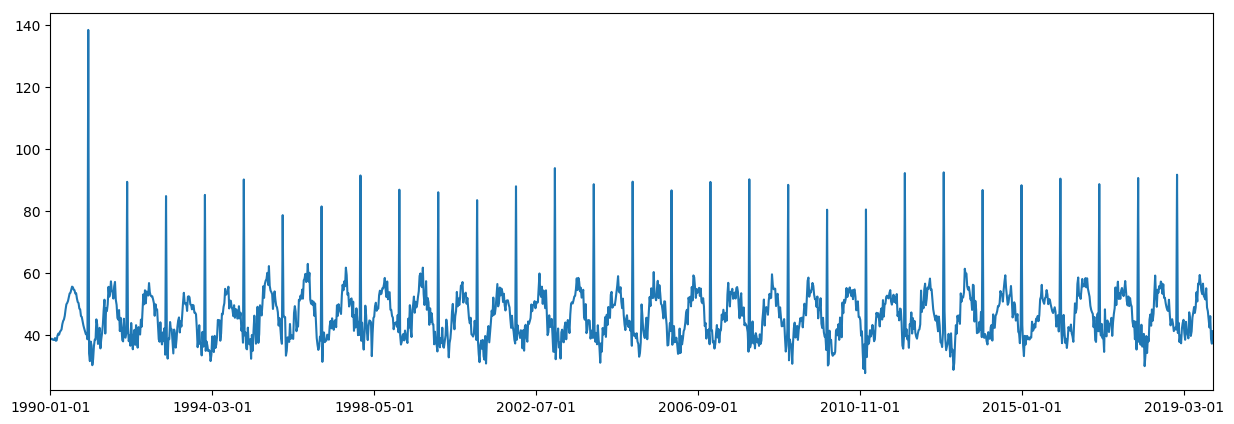

In [272]:
df.DEWP.plot()

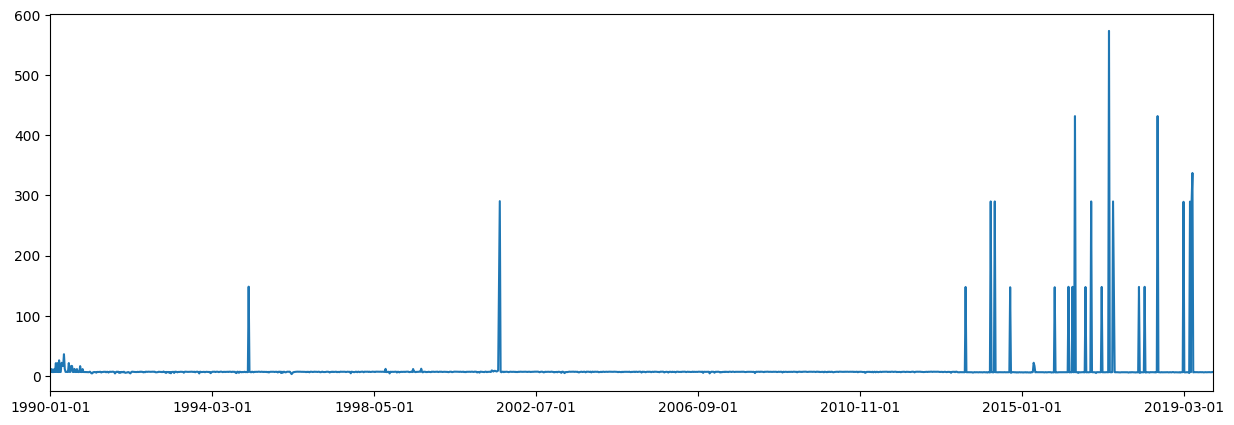

In [273]:
df.VISIB.plot()

In [274]:
df = replace_outliers(df, "VISIB")

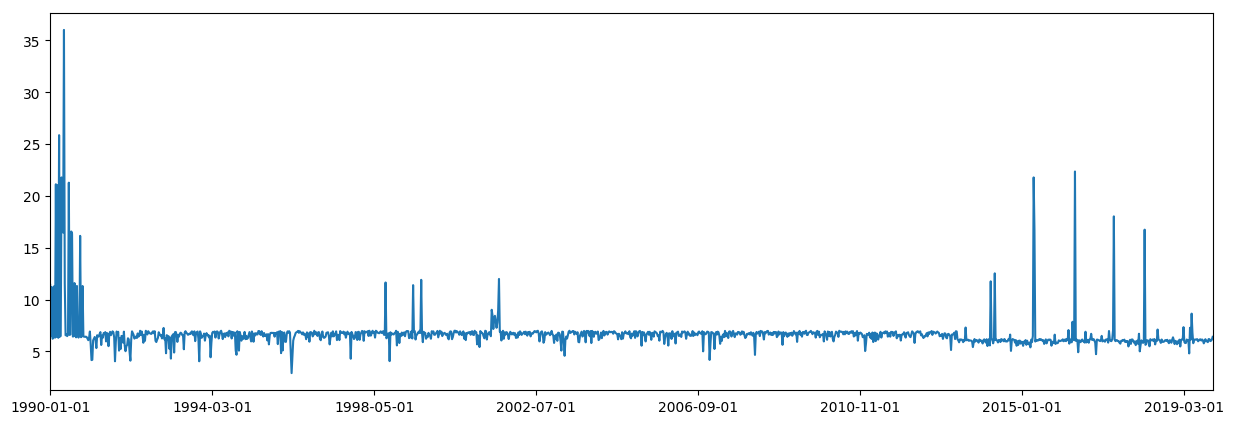

In [275]:
df.VISIB.plot()

In [276]:
df.describe()

,TEMP,DEWP,VISIB,WDSP,PRCP
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,51.716368,46.411825,6.671639,10.446937,54.985946
std,7.492234,9.190128,1.691880,5.976037,28.147163
min,29.185714,27.614286,2.914286,1.985714,0.000000
25%,45.535714,40.225000,6.157143,8.335714,28.568571
50%,51.457143,45.421429,6.614286,10.043842,57.137143
75%,58.146429,51.485714,6.842857,12.003571,71.421429
max,70.400000,138.468981,36.016080,151.527041,99.990000


In [277]:
df.to_csv("../analysis/London.csv")